# 스타벅스와 이디야 

- 자료 위치 : 소상공인시장진흥공단_상가업소정보_201906
- https://www.data.go.kr/dataset/15012005/fileData.do

- 뉴스기사 : 스타벅스 '쏠림' vs 이디야 '분산'
- http://news.bizwatch.co.kr/article/consumer/2018/01/19/0015

# 환경설정

In [1]:
import pandas as pd
import numpy as np
import re

# 경고 메세지 없애기
import warnings
warnings.filterwarnings('ignore')

# 시각화 라이브러리 임포트 
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
print(font_name)
plt.rc('font', family=font_name)

import seaborn as sns

# 지도 표현
import folium

Malgun Gothic


In [2]:
shop_2019 = pd.read_csv('../data/commercial_store/소상공인시장진흥공단_상가업소정보_201906_01.csv')
shop_2019.head()

상가업소번호            상호명         지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
0  19911397  커피빈코리아선릉로93길점  코리아선릉로93길점         Q       음식       Q12    커피점/카페   
1  19911801           프로포즈         NaN         Q       음식       Q09      유흥주점   
2  19912201       싱싱커피&토스트         NaN         Q       음식       Q07     패스트푸드   
3  19905471         와라와라호프         NaN         Q       음식       Q09      유흥주점   
4  19932756       가락사우나내스낵         NaN         F    생활서비스       F09  대중목욕탕/휴게   

  상권업종소분류코드     상권업종소분류명 표준산업분류코드  ...                     건물관리번호       건물명  \
0    Q12A01  커피전문점/카페/다방   I56220  ...  1168010100106960042022041       NaN   
1    Q09A01        호프/맥주   I56219  ...  1154510200101620001017748       NaN   
2    Q07A10        토스트전문   I56192  ...  2653010400105780000002037  산업용품유통상가   
3    Q09A01        호프/맥주   I56219  ...  1168010600106040000014378      대치상가   
4    F09A02   사우나/증기탕/온천   S96121  ...  1171010500102560005010490       NaN   

                  도로명주소   구우편번호    신우편번호  동정보 층정보  호정보          경도         위도  
0    서울특별시 강남구 선릉로93길 6  135080   6149.0  NaN   1  NaN  127.047883  37.505675  
1    서울특별시 금천구 가산로 34-6  153010   8545.0  NaN   1  NaN  126.899220  37.471711  
2      부산광역시 사상구 괘감로 37  617726  46977.0  NaN   1   26  128.980455  35.159774  
3  서울특별시 강남구 남부순환로 2933  135280   6280.0  NaN   1  NaN  127.061026  37.493922  
4      서울특별시 송파구 가락로 71  138846   5690.0  NaN   1  NaN  127.104071  37.500249  

[5 rows x 39 columns]

In [3]:
shop_2019.shape

(565016, 39)

In [4]:
shop_2019.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [5]:
df_seoul = shop_2019.loc[shop_2019['시도명'].str.startswith('서울')].copy()
df_seoul.shape

(401071, 39)

## 결측치 확인하기

In [6]:
df_seoul.isnull().sum()

상가업소번호            0
상호명               0
지점명          344270
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      23587
표준산업분류명       23587
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         75924
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        354031
건물관리번호            0
건물명          205736
도로명주소             0
구우편번호             0
신우편번호             2
동정보          369770
층정보          125634
호정보          343797
경도                0
위도                0
dtype: int64

## 서울에 있는 스타벅스, 이디야 데이타프레임 생성하기 

In [7]:
df_seoul.loc[df_seoul['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'), '상호명'].shape

(502,)

In [8]:
df_seoul.loc[df_seoul['상호명'].str.contains('이디야|ediya|EDIYA'), '상호명'].shape

(501,)

In [9]:
df_cafe = df_seoul[df_seoul['상호명'].str.contains('스타벅스|starbucks|STARBUCKS|이디야|ediya|EDIYA')]
df_cafe.shape

(1003, 39)

In [10]:
df_cafe.head()

상가업소번호        상호명     지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
1219  19976038       스타벅스    이태원점         Q       음식       Q12   커피점/카페   
1676  25435527      이디야커피    신길역점         Q       음식       Q12   커피점/카페   
1946  19998811  스타벅스종로3가점   종로3가점         Q       음식       Q12   커피점/카페   
2840  20680373       스타벅스    신사2점         Q       음식       Q12   커피점/카페   
2886  20592419      이디야커피  이마트구로점         Q       음식       Q12   커피점/카페   

     상권업종소분류코드     상권업종소분류명 표준산업분류코드  ...                     건물관리번호      건물명  \
1219    Q12A01  커피전문점/카페/다방   I56220  ...  1117013000101270029009542      NaN   
1676    Q12A01  커피전문점/카페/다방   I56220  ...  1156013200100590002019075  엔씨티오피스텔   
1946    Q12A01  커피전문점/카페/다방   I56220  ...  1111015600100090003016323      NaN   
2840    Q12A01  커피전문점/카페/다방   I56220  ...  1165010600100280001019301     푸른빌딩   
2886    Q12A01  커피전문점/카페/다방   I56220  ...  1153010200101880026022963   이마트구로점   

                     도로명주소   구우편번호   신우편번호  동정보  층정보  호정보          경도  \
1219    서울특별시 용산구 이태원로 188  140200  4406.0  NaN  NaN   29  126.994781   
1676   서울특별시 영등포구 영등포로 353  150050  7318.0  NaN    1  NaN  126.918062   
1946    서울특별시 종로구 종로 113-1  110123  3139.0  NaN    1  NaN  126.990207   
2840    서울특별시 서초구 강남대로 581  137904  6530.0  NaN    2  NaN  127.019763   
2886  서울특별시 구로구 디지털로32길 43  152050  8379.0  NaN    3  NaN  126.897870   

             위도  
1219  37.534303  
1676  37.515118  
1946  37.570585  
2840  37.513663  
2886  37.484385  

[5 rows x 39 columns]

In [11]:
df_seoul.loc[df_seoul['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'), '상호명'].value_counts()

스타벅스                296
스타벅스양천향교역             2
스타벅스방배카페입구            1
스타벅스성신여대정문            1
스타벅스월드컵경기장점           1
스타벅스노원마들역점            1
스타벅스강북구청사거리점          1
스타벅스구산역점              1
스타벅스사당점               1
스타벅스한남동점              1
스타벅스신사가로수점            1
스타벅스석촌서호점             1
스타벅스커피홍대역             1
스타벅스학여울점              1
스타벅스문정하비오점            1
스타벅스사당로데오점            1
스타벅스연신내역점             1
스타벅스가든파이브             1
스타벅스숙대점               1
스타벅스연희DT점             1
스타벅스황학캐슬점             1
스타벅스경복아파트점            1
스타벅스숭실대점              1
스타벅스종로수송점             1
스타벅스노원케이티점            1
스타벅스서소문배재점            1
스타벅스삼성도심공항점           1
스타벅스강남오거리점            1
스타벅스명지대점              1
스타벅스커피가산그레이트          1
                   ... 
스타벅스종각점               1
스타벅스포스코사거리점           1
스타벅스커피신도림디큐브시티B2      1
스타벅스삼청동점              1
스타벅스금천독산점             1
스타벅스경복궁역              1
스타벅스종로3가점             1
스타벅스신대방삼거리역점          1
스타벅스석촌역               1
스타벅스미아역점              1
스타벅스올림픽공원남문점    

In [12]:
df_cafe.loc[df_cafe['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'), '브랜드명'] = '스타벅스'

In [13]:
df_cafe[['상호명', '브랜드명']].head(20)

상호명  브랜드명
1219             스타벅스  스타벅스
1676            이디야커피   NaN
1946        스타벅스종로3가점  스타벅스
2840             스타벅스  스타벅스
2886            이디야커피   NaN
8718            이디야커피   NaN
14596           이디야커피   NaN
14939  스타벅스커피여의도IFC1F  스타벅스
14951            스타벅스  스타벅스
15161           이디야커피   NaN
15168           이디야커피   NaN
15343      이디야IBK고객센터   NaN
15379           이디야커피   NaN
15707           이디야커피   NaN
16354            스타벅스  스타벅스
16851      스타벅스신림사거리점  스타벅스
25513            스타벅스  스타벅스
26275       이디야서대문점2호   NaN
28762       스타벅스커피홍대역  스타벅스
30069           이디야커피   NaN

### '브랜드명'이 NaN인 결측치 값을 '이디야'로 채우기

In [14]:
df_cafe.loc[df_cafe['브랜드명'].isnull(), '상호명'].head()

1676     이디야커피
2886     이디야커피
8718     이디야커피
14596    이디야커피
15161    이디야커피
Name: 상호명, dtype: object

In [15]:
df_cafe['브랜드명'] = df_cafe['브랜드명'].fillna('이디야')

In [16]:
df_cafe['브랜드명'].value_counts()

스타벅스    502
이디야     501
Name: 브랜드명, dtype: int64

## '상호명','브랜드명' 컬럼 확인하기 

In [17]:
df_cafe[['상호명','브랜드명']].head()

상호명  브랜드명
1219       스타벅스  스타벅스
1676      이디야커피   이디야
1946  스타벅스종로3가점  스타벅스
2840       스타벅스  스타벅스
2886      이디야커피   이디야

In [18]:
df_cafe['브랜드명'].value_counts()

스타벅스    502
이디야     501
Name: 브랜드명, dtype: int64

## folium 시각화

In [19]:
geo_df = df_cafe

In [20]:
map = folium.Map(location=[geo_df['위도'].mean(), 
                           geo_df['경도'].mean()], 
                 zoom_start=12, 
                 tiles='Stamen Toner')

for n in geo_df.index:    
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    
    if geo_df.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'
    else:
        icon_color = 'blue'  
    
    folium.CircleMarker(
        location=[geo_df.loc[n,'위도'], 
                  geo_df.loc[n, '경도']],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map

## 구별 브랜드별 점포수로 데이타프레임 생성하기

In [36]:
df_cafe.groupby(['시군구명', '브랜드명'])['상호명'].count()

시군구명  브랜드명
강남구   스타벅스    84
      이디야     44
강동구   스타벅스    13
      이디야     12
강북구   스타벅스     5
      이디야     11
강서구   스타벅스    17
      이디야     41
관악구   스타벅스     9
      이디야     23
광진구   스타벅스    14
      이디야     16
구로구   스타벅스    12
      이디야     21
금천구   스타벅스    13
      이디야     11
노원구   스타벅스     9
      이디야     34
도봉구   스타벅스     1
      이디야      9
동대문구  스타벅스     8
      이디야     19
동작구   스타벅스     8
      이디야     11
마포구   스타벅스    30
      이디야     22
서대문구  스타벅스    19
      이디야     13
서초구   스타벅스    48
      이디야     19
성동구   스타벅스     6
      이디야     17
성북구   스타벅스    13
      이디야     22
송파구   스타벅스    28
      이디야     27
양천구   스타벅스    11
      이디야     17
영등포구  스타벅스    30
      이디야     28
용산구   스타벅스    20
      이디야     11
은평구   스타벅스    10
      이디야     21
종로구   스타벅스    33
      이디야     17
중구    스타벅스    55
      이디야     24
중랑구   스타벅스     6
      이디야     11
Name: 상호명, dtype: int64

In [35]:
df_cafe_brand = pd.DataFrame(
    df_cafe.groupby(['시군구명', '브랜드명'])['상호명'].count()
).reset_index()

In [36]:
df_cafe_brand

시군구명  브랜드명  상호명
0    강남구  스타벅스   84
1    강남구   이디야   44
2    강동구  스타벅스   13
3    강동구   이디야   12
4    강북구  스타벅스    5
5    강북구   이디야   11
6    강서구  스타벅스   17
7    강서구   이디야   41
8    관악구  스타벅스    9
9    관악구   이디야   23
10   광진구  스타벅스   14
11   광진구   이디야   16
12   구로구  스타벅스   12
13   구로구   이디야   21
14   금천구  스타벅스   13
15   금천구   이디야   11
16   노원구  스타벅스    9
17   노원구   이디야   34
18   도봉구  스타벅스    1
19   도봉구   이디야    9
20  동대문구  스타벅스    8
21  동대문구   이디야   19
22   동작구  스타벅스    8
23   동작구   이디야   11
24   마포구  스타벅스   30
25   마포구   이디야   22
26  서대문구  스타벅스   19
27  서대문구   이디야   13
28   서초구  스타벅스   48
29   서초구   이디야   19
30   성동구  스타벅스    6
31   성동구   이디야   17
32   성북구  스타벅스   13
33   성북구   이디야   22
34   송파구  스타벅스   28
35   송파구   이디야   27
36   양천구  스타벅스   11
37   양천구   이디야   17
38  영등포구  스타벅스   30
39  영등포구   이디야   28
40   용산구  스타벅스   20
41   용산구   이디야   11
42   은평구  스타벅스   10
43   은평구   이디야   21
44   종로구  스타벅스   33
45   종로구   이디야   17
46    중구  스타벅스   55
47    중구   이디야   24
48   중랑구  스타벅스    6
49   중랑구   이디야   11

In [40]:
df_cafe_brand.columns = ['구', '브랜드명', '매장수']
df_cafe_brand

구  브랜드명  매장수
0    강남구  스타벅스   84
1    강남구   이디야   44
2    강동구  스타벅스   13
3    강동구   이디야   12
4    강북구  스타벅스    5
5    강북구   이디야   11
6    강서구  스타벅스   17
7    강서구   이디야   41
8    관악구  스타벅스    9
9    관악구   이디야   23
10   광진구  스타벅스   14
11   광진구   이디야   16
12   구로구  스타벅스   12
13   구로구   이디야   21
14   금천구  스타벅스   13
15   금천구   이디야   11
16   노원구  스타벅스    9
17   노원구   이디야   34
18   도봉구  스타벅스    1
19   도봉구   이디야    9
20  동대문구  스타벅스    8
21  동대문구   이디야   19
22   동작구  스타벅스    8
23   동작구   이디야   11
24   마포구  스타벅스   30
25   마포구   이디야   22
26  서대문구  스타벅스   19
27  서대문구   이디야   13
28   서초구  스타벅스   48
29   서초구   이디야   19
30   성동구  스타벅스    6
31   성동구   이디야   17
32   성북구  스타벅스   13
33   성북구   이디야   22
34   송파구  스타벅스   28
35   송파구   이디야   27
36   양천구  스타벅스   11
37   양천구   이디야   17
38  영등포구  스타벅스   30
39  영등포구   이디야   28
40   용산구  스타벅스   20
41   용산구   이디야   11
42   은평구  스타벅스   10
43   은평구   이디야   21
44   종로구  스타벅스   33
45   종로구   이디야   17
46    중구  스타벅스   55
47    중구   이디야   24
48   중랑구  스타벅스    6
49   중랑구   이디야   11

## 시각화

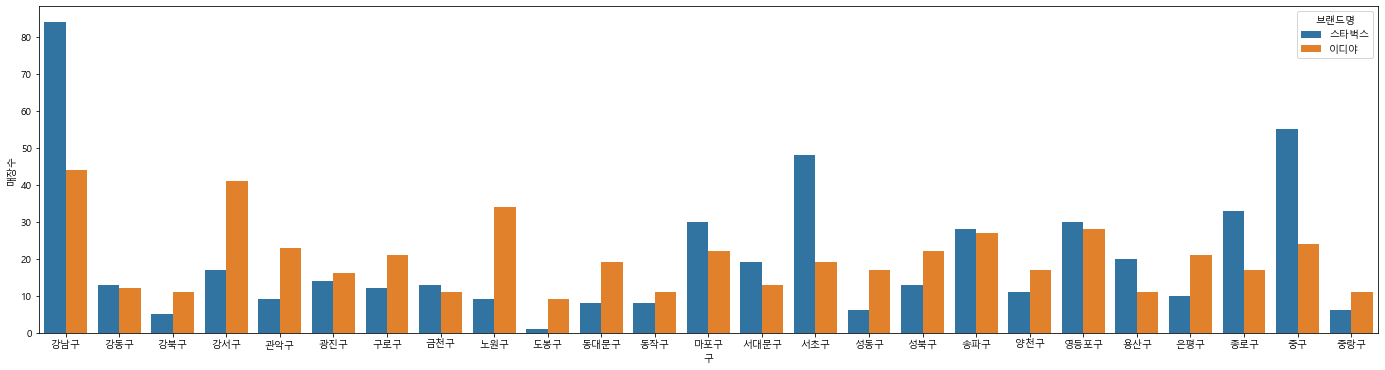

In [43]:
plt.figure(figsize=(24, 6))
sns.barplot(data=df_cafe_brand, x='구', y='매장수', 
            hue='브랜드명')

## groupby로 구별로 갯수 확인하기

In [40]:
df_cafe.groupby(['시군구명'])['상호명'].count()

시군구명
강남구     128
강동구      25
강북구      16
강서구      58
관악구      32
광진구      30
구로구      33
금천구      24
노원구      43
도봉구      10
동대문구     27
동작구      19
마포구      52
서대문구     32
서초구      67
성동구      23
성북구      35
송파구      55
양천구      28
영등포구     58
용산구      31
은평구      31
종로구      50
중구       79
중랑구      17
Name: 상호명, dtype: int64

In [41]:
df_cafe_gu = pd.DataFrame(
    df_cafe.groupby(['시군구명'])['상호명'].count()
 )
df_cafe_gu.columns = ['매장수']
df_cafe_gu.head()

매장수
시군구명     
강남구   128
강동구    25
강북구    16
강서구    58
관악구    32

## choropleth 그리기

* 구별로 매장수를 표현

In [42]:
import json
geo_path = '../data/seoul_municipalities_geo_simple.json'
geo_json = json.load(open(geo_path, encoding='utf-8'))
geo_json

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.05181987399999, 37.685815952999974],
      [127.05195432999994, 37.68295554600002],
      [127.05124372099999, 37.68200315500002],
      [127.050936224, 37.68010014399999],
      [127.04973706099997, 37.676724165999985],
      [127.04887969799995, 37.67518859900002],
      [127.04820611399998, 37.67048413200001],
      [127.04893704599999, 37.667590002],
      [127.05142672199997, 37.663973570999985],
      [127.051469816, 37.66042898699999],
      [127.05343323299996, 37.65751023399997],
      [127.054073077, 37.654496732999974],
      [127.05376492699997, 37.652060053000014],
      [127.05396756200003, 37.650582568],
      [127.05545541100003, 37.64824690299997],
      [127.05584227600002, 37.64705617300001],
      [127.05566746900001, 37.64460474399999],
      [127.05516606799995, 37.643454948],
      [127.05513914699998, 37.64133787499998],
      [127.0547437

### 스타벅스 이디야 카페 매장 합계 분포

In [43]:
map = folium.Map(location=[geo_df['위도'].mean(), 
                           geo_df['경도'].mean()], 
                 zoom_start=12)

map.choropleth(geo_data = geo_json,
data = df_cafe_gu['매장수'],
columns = [df_cafe_gu.index, df_cafe_gu['매장수']],
fill_color = 'Purples',
key_on = 'properties.SIG_KOR_NM',
fill_opacity=0.7,
line_opacity=0.2,
highlight=True)


for n in geo_df.index:
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    
    if geo_df.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
    
    # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
    # --> folium.vector_layer.CircleMarker 를 사용합니다. 
    folium.CircleMarker(
        location=[geo_df.loc[n,'위도'], 
                  geo_df.loc[n, '경도']],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

map

### 스타벅스 매장 분포

In [45]:
df_cafe_temp = df_cafe[df_cafe['브랜드명'] == '스타벅스']
df_cafe_starbucks = pd.DataFrame(
    df_cafe_temp.groupby(['시군구명'])['상호명'].count()
)
df_cafe_starbucks.columns = ['매장수']
df_cafe_starbucks.head()

매장수
시군구명     
강남구    84
강동구    13
강북구     5
강서구    17
관악구     9

In [46]:
map = folium.Map(location=[geo_df['위도'].mean(), 
                           geo_df['경도'].mean()], 
                 zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_json,
               data = df_cafe_starbucks['매장수'],
               columns = [df_cafe_starbucks.index, 
                          df_cafe_starbucks['매장수']],
               fill_color = 'YlGn',
               key_on = 'properties.SIG_KOR_NM',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


for n in geo_df.index:
    
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    
    if geo_df.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'    

        folium.CircleMarker(
            location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
            radius=3,
            popup=popup_name,
            color= icon_color,
            fill=True,
            fill_color=icon_color
        ).add_to(map)


map

### 이디야 매장 분포

In [47]:
df_cafe_temp = df_cafe[df_cafe['브랜드명'] == '이디야']
df_cafe_ediya = pd.DataFrame(df_cafe_temp.groupby(['시군구명'])['상호명'].count())
df_cafe_ediya.columns = ['매장수']
df_cafe_ediya.head()

매장수
시군구명     
강남구    44
강동구    12
강북구    11
강서구    41
관악구    23

In [48]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_json,
               data = df_cafe_ediya['매장수'],
               columns = [df_cafe_ediya.index, df_cafe_ediya['매장수']],
               fill_color = 'PuBu',
               key_on = 'properties.SIG_KOR_NM',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


for n in geo_df.index:
    
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    
    if geo_df.loc[n, '브랜드명'] == '이디야' :
        icon_color = 'blue'    

        folium.CircleMarker(
            location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
            radius=3,
            popup=popup_name,
            color= icon_color,
            fill=True,
            fill_color=icon_color
        ).add_to(map)


map

# 스타벅스와 이디야 비교

In [54]:
df_cafe_brand.head()
df_cafe_brand.columns = ['구', '브랜드명','매장수']

In [55]:
df_cafe_brand.head()

구  브랜드명  매장수
0  강남구  스타벅스   84
1  강남구   이디야   44
2  강동구  스타벅스   13
3  강동구   이디야   12
4  강북구  스타벅스    5

In [56]:
df_cafe_brand_vs = df_cafe_brand.pivot_table(index='구',columns='브랜드명',values='매장수')
df_cafe_brand_vs.columns = ['스타벅스', '이디야']
df_cafe_brand_vs.head()

스타벅스  이디야
구             
강남구    84   44
강동구    13   12
강북구     5   11
강서구    17   41
관악구     9   23

In [57]:
df_cafe_brand_vs['매장수비교'] = df_cafe_brand_vs.apply(lambda x : 1 if x['스타벅스'] > x['이디야'] else 0, axis=1)
df_cafe_brand_vs.head()

스타벅스  이디야  매장수비교
구                    
강남구    84   44      1
강동구    13   12      1
강북구     5   11      0
강서구    17   41      0
관악구     9   23      0

In [58]:
lng_list = []
lat_list = []
for gu in df_cafe_brand_vs.index:
    lat = df_cafe.loc[df_cafe['시군구명'] == gu, '위도'].mean()
    lng = df_cafe.loc[df_cafe['시군구명'] == gu, '경도'].mean()
    lat_list.append(lat)
    lng_list.append(lng)
    
df_cafe_brand_vs['위도'] = lat_list
df_cafe_brand_vs['경도'] = lng_list
df_cafe_brand_vs.head()

스타벅스  이디야  매장수비교         위도          경도
구                                           
강남구    84   44      1  37.506152  127.045159
강동구    13   12      1  37.540512  127.135966
강북구     5   11      0  37.632224  127.022390
강서구    17   41      0  37.556381  126.837973
관악구     9   23      0  37.481693  126.935638

In [59]:
df_cafe_brand_vs['스타벅스'] = df_cafe_brand_vs['스타벅스'].astype(float)
df_cafe_brand_vs['이디야'] = df_cafe_brand_vs['이디야'].astype(float)
df_cafe_brand_vs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 5 columns):
스타벅스     25 non-null float64
이디야      25 non-null float64
매장수비교    25 non-null int64
위도       25 non-null float64
경도       25 non-null float64
dtypes: float64(4), int64(1)
memory usage: 1.2+ KB


In [60]:
map = folium.Map(location=[geo_df['위도'].mean(), 
                           geo_df['경도'].mean()], 
                 zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_json,
       data = df_cafe_brand_vs['매장수비교'],
       columns = [df_cafe_brand_vs.index, 
                  df_cafe_brand_vs['매장수비교']],
       fill_color = 'BuGn',
       key_on = 'properties.SIG_KOR_NM',
       fill_opacity=0.7,
       line_opacity=0.2,
       highlight=True)


for gu in df_cafe_brand_vs.index:
        
    for cafe in ['스타벅스', '이디야']:
        
        cafe_count = df_cafe_brand_vs.loc[gu, cafe]
        msg = f'{gu} {cafe} 매장수 : {cafe_count:.0f}'
        
        icon_color = 'blue'
        if cafe == '스타벅스': 
            icon_color = 'green'
        
        folium.CircleMarker(
    location = [df_cafe_brand_vs.loc[gu,'위도'], 
                df_cafe_brand_vs.loc[gu,'경도']],
    radius = cafe_count,
    color = icon_color,
    popup = msg,
    fill = True,
    fill_color = icon_color
        ).add_to(map)

map